# Analysis of cleaned Bubble Sort data, PC 16 only
## This notebook is used to answer SQ 2, SQ 3 and the RQ of our project. 

#### Imports and loading CSVs in Dataframes

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

dfBubble16 = pd.read_csv("CleanData/BubbleClean-PC16.csv")
dfRead16 = pd.read_csv("CleanData/readCSVClean-PC16.csv")

dfBubble16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,3.971802,3.439758,0.211914,436.274,67.0,best,25000.0
1,3.906067,3.412231,0.196228,387.021,67.0,best,25000.0
2,4.092834,3.593201,0.196289,403.466,67.0,best,25000.0
3,4.208069,3.704956,0.201599,407.394,67.0,best,25000.0
4,3.952576,3.416504,0.207581,446.493,67.0,best,25000.0


In [33]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.240601,1.966187,0.134399,227.880,53.0,random1,25000
1,2.062317,1.775085,0.126160,250.212,53.0,random1,25000
2,2.140869,1.876709,0.121887,222.526,53.0,random1,25000
3,2.217102,1.940735,0.133545,226.620,53.0,random1,25000
4,2.058533,1.796814,0.119385,219.516,53.0,random1,25000


In [34]:
def calcMean(df,type,size):
    rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
    rowMean["Input case"] = type
    return rowMean
    

def meansOfTests(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfBubbleMean16 = meansOfTests(dfBubble16)
dfBubbleMean16


<ipython-input-34-facee4998700>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,4.13115,3.61917,0.20069,409.145,68.3453,25000,best
1,7.62605,6.67748,0.296455,877.971,66.058,50000,best
2,16.708,14.6685,0.503585,2100.78,62.6731,75000,best
3,27.2136,23.9209,0.740464,3502.27,61.6223,100000,best
4,99.2977,87.4707,2.34841,13055.8,61.4,200000,best
...,...,...,...,...,...,...,...
91,144.978,126.161,3.6453,21001.3,58.9722,100000,random10
92,580.759,505.308,14.2135,84529.3,58.5758,200000,random10
93,1308.05,1139.03,31.6384,189277,59.8947,300000,random10
94,2324.83,2024.55,56.2029,335993,60.2857,400000,random10


In [35]:

def listOfCases(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def meansOfTestsReadCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = listOfCases(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = meansOfTestsReadCSV(dfRead16)
dfReadMean16

<ipython-input-34-facee4998700>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.14915,1.87396,0.12836,231.807,53.9737,25000,random1
1,2.51943,2.18513,0.150334,264.781,57,50000,random1
2,3.05994,2.66851,0.178193,304.554,61,75000,random1
3,3.52485,3.07726,0.205626,343.571,63.5278,100000,random1
4,4.16606,3.62685,0.233299,420.754,65.425,200000,random1
...,...,...,...,...,...,...,...
333,5.76346,5.00365,0.308558,583.527,71.9871,600000,sorted
334,6.14807,5.33067,0.330684,631.253,70.9112,700000,sorted
335,6.69911,5.80867,0.349253,706.156,70.1407,800000,sorted
336,7.18797,6.25124,0.367782,776.198,69.3281,900000,sorted


In [36]:
dfBubbleMean16 = dfBubbleMean16.reset_index(drop=True)
dfReadMean16 = dfReadMean16.reset_index(drop=True)
dfBubbleMean16
#remove nans here?

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,4.13115,3.61917,0.20069,409.145,68.3453,25000,best
1,7.62605,6.67748,0.296455,877.971,66.058,50000,best
2,16.708,14.6685,0.503585,2100.78,62.6731,75000,best
3,27.2136,23.9209,0.740464,3502.27,61.6223,100000,best
4,99.2977,87.4707,2.34841,13055.8,61.4,200000,best
...,...,...,...,...,...,...,...
91,144.978,126.161,3.6453,21001.3,58.9722,100000,random10
92,580.759,505.308,14.2135,84529.3,58.5758,200000,random10
93,1308.05,1139.03,31.6384,189277,59.8947,300000,random10
94,2324.83,2024.55,56.2029,335993,60.2857,400000,random10


In [37]:
def deductReadFromAlg(dfMeanAlg, dfReadMean):
    lCPU = []
    lTime = []
    lDRAM = []

    for i in range(len(dfMeanAlg["Size"])):
        case = dfMeanAlg["Input case"][i]
        size = dfMeanAlg["Size"][i]
        #define best, worst and random inputs for each alg here!
        if case == "best":
                case2 = "sorted"
        if case == "worst":
            case2 = "reversesorted"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        rawCPU = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"].index.tolist()[0]]
        readCPU = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lCPU.append(rawCPU-readCPU)

        rawTime = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"].index.tolist()[0]]
        readTime = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["Time (ms)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lTime.append(rawTime - readTime)

        rawDRAM = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["DRAM (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        readDRAM = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["DRAM (J)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lDRAM.append(rawDRAM-readDRAM)

    dfMeanAlg["CPU - readCSV"] = lCPU
    dfMeanAlg["Time - readCSV"] = lTime
    dfMeanAlg["Memory - readCSV"] = lDRAM


deductReadFromAlg(dfBubbleMean16,dfReadMean16)

dfBubbleMean16.head()

<ipython-input-37-7a616e22ac5e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rawCPU = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-37-7a616e22ac5e>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  readCPU = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-37-7a616e22ac5e>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rawTime = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"].index.tolist()[0]]
<ipython-input-37-7a616e22ac5e>:22: UserWarning: Boolean Series key will be reindexed 

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV
0,4.13115,3.61917,0.20069,409.145,68.3453,25000,best,1.934188,201.900091,0.086675
1,7.62605,6.67748,0.296455,877.971,66.058,50000,best,4.543261,631.845264,0.154319
2,16.708,14.6685,0.503585,2100.78,62.6731,75000,best,12.113200,1816.149317,0.332747
3,27.2136,23.9209,0.740464,3502.27,61.6223,100000,best,21.055334,3188.023727,0.551743
4,99.2977,87.4707,2.34841,13055.8,61.4,200000,best,83.830459,12658.438980,2.121239


# PLOTS

## SQ 2: Time vs input size regressions

In [38]:

# For bubblesort: polynomial regression

def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10)
        if dg ==1:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [39]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [40]:
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    size2 = []
    for case in ["best", "worst", "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                size2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    size2.append(df["Size"][getIndex(df,case+str(i),size)] * df["Size"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["Size^2"] = size2

calcPercent(dfBubbleMean16)

dfBubbleMean16.head()

<ipython-input-39-565db17a79a7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,Size^2
0,4.13115,3.61917,0.20069,409.145,68.3453,25000,best,1.934188,201.900091,0.086675,87.606776,100,2.020863,6.250000e+08
1,7.62605,6.67748,0.296455,877.971,66.058,50000,best,4.543261,631.845264,0.154319,87.561420,100,4.697579,2.500000e+09
2,16.708,14.6685,0.503585,2100.78,62.6731,75000,best,12.113200,1816.149317,0.332747,87.793384,100,12.445947,5.625000e+09
3,27.2136,23.9209,0.740464,3502.27,61.6223,100000,best,21.055334,3188.023727,0.551743,87.900250,100,21.607077,1.000000e+10
4,99.2977,87.4707,2.34841,13055.8,61.4,200000,best,83.830459,12658.438980,2.121239,88.089301,100,85.951698,4.000000e+10


## SQ 2: Time vs BigO

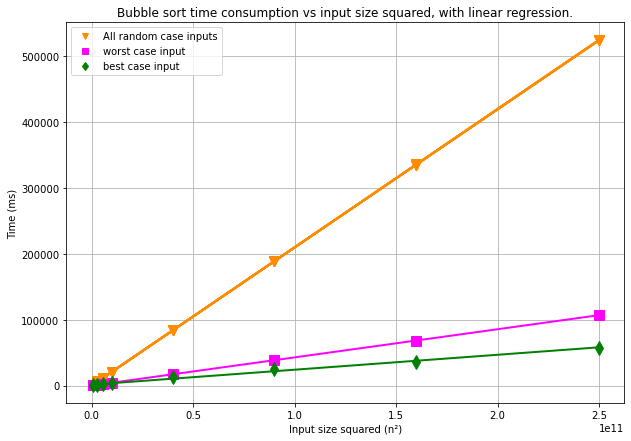

In [41]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="All random case inputs")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="best case input")
#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort time consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()


## Zoom: Time vs n^2

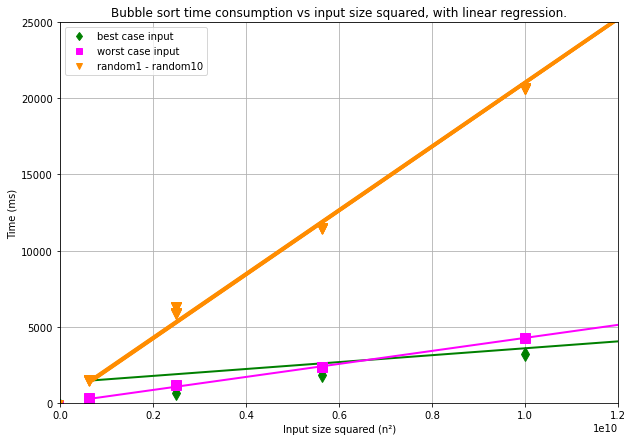

In [42]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="best case input")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort time consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Time (ms)")
plt.grid()
plt.xlim(0,12000000000)
plt.ylim(0,25000)
plt.legend()
plt.show()


## SQ 3: Energy vs. Time


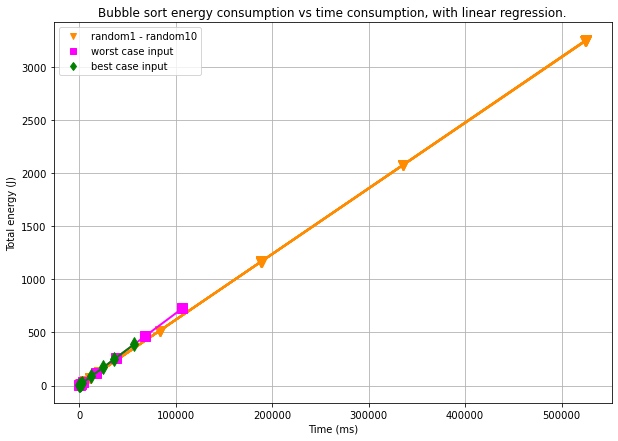

In [43]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="best case input")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort energy consumption vs time consumption, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.grid()
plt.show()


## Zoom: Energy vs. Time 

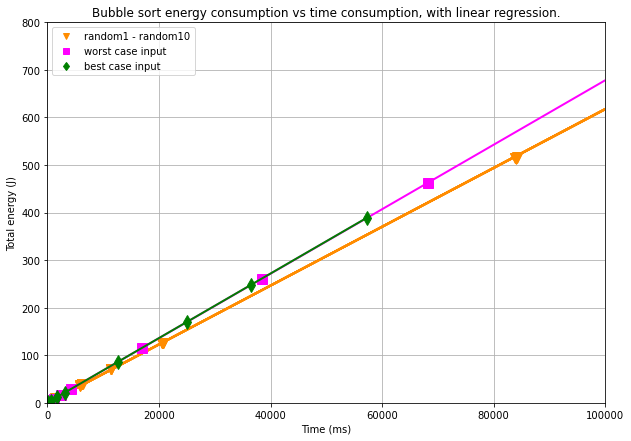

In [44]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="best case input")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort energy consumption vs time consumption, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.xlim(0,100000)
plt.ylim(0,800)
plt.legend(loc="upper left")
plt.grid()
plt.show()

## RQ: EC vs BigO

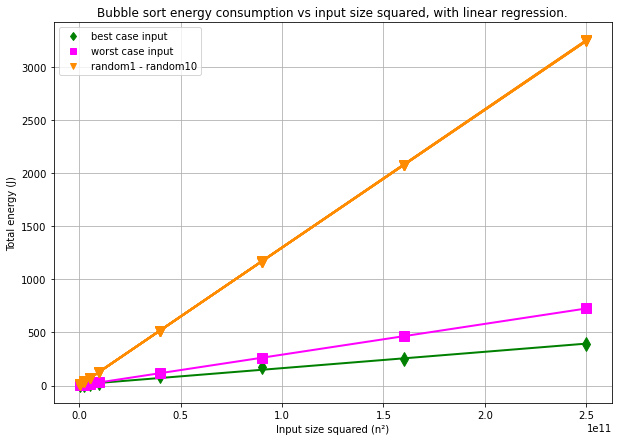

In [45]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="best case input")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend()
plt.show()

## Zoom: Energy vs. BigO

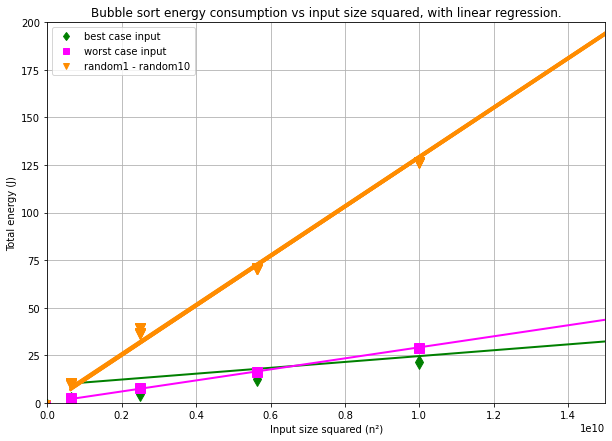

In [46]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="best case input")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend(loc="upper left")
plt.xlim(0,15000000000)
plt.ylim(0,200)
plt.show()